In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [154]:
# get gamap's WhGrYlRd color scheme from file
from matplotlib.colors import ListedColormap
WhGrYlRd_scheme = np.genfromtxt('colormap/WhGrYlRd.txt',delimiter=' ')
WhGrYlRd = ListedColormap(WhGrYlRd_scheme/255.0)

In [138]:
def open_FV3(maindir,prefix):

    ds = xr.open_mfdataset(maindir+prefix+'.tile*.nc',
                           concat_dim='tile',decode_times=False)
    grid = xr.open_mfdataset(maindir+'atmos_static.tile*.nc',
                             concat_dim='tile',decode_times=False)
    
    ds["lon"] = grid["grid_lont"]
    ds["lat"] = grid["grid_latt"]
    ds["lon_b"] = grid["grid_lon"]
    ds["lat_b"] = grid["grid_lat"]
    
    ds.set_coords(["lon", "lat", "lon_b", "lat_b"], inplace=True)
    ds.rename(dict(grid_xt="x", grid_yt="y", 
                   grid_x="x_b", grid_y="y_b"), 
              inplace=True)
    
    return ds

prefix = 'tracer_daily'
maindir = "/Users/desnow/Research/FV3/C48L20/"
ds = open_FV3(maindir,prefix)

In [139]:
ds.data_vars

Data variables:
    plume01  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume02  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume03  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume04  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume05  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume06  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume07  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    plume08  (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def plot_CSlayer(dr,ds,ax,mask=2,vmin=None,vmax=None,**kwargs):
    
    # Have to use the same range for all tiles
    if vmax is None: 
        vmax=dr.max()
    if vmin is None: 
        vmin=dr.min()
        
    # mask cells near boundaries otherwise they will span the entire map 
    mask = np.abs(ds["lon"] - 180) >= mask
    for i in range(6):
        ax.pcolormesh(ds['lon_b'].isel(tile=i),
                      ds['lat_b'].isel(tile=i),
                      dr.where(mask).isel(tile=i).to_masked_array(copy=False),
                      vmin=vmin,vmax=vmax,**kwargs)

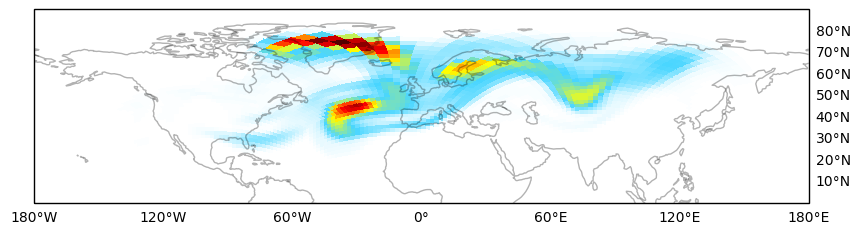

In [198]:
proj = ccrs.PlateCarree()

plt.figure(figsize=[10,6])
ax = plt.axes(projection=proj)
ax.coastlines(alpha=0.3)
plot_CSlayer(ds['plume02'].isel(time=-1).mean(dim='pfull'),
             ds,ax,cmap=WhGrYlRd)
ax.set_ylim([0,90])
#ax.set_xlim([-120,120])

gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=2, color='white', alpha=1.0,linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER